In [29]:
import os
from get_keypts import get_keypts
import pandas as pd
import numpy as np

In [30]:
images = os.listdir("images"); images

['image2.jpg',
 'image4.jpg',
 'image6.jpg',
 'image5.jpg',
 'image3.jpg',
 'image1.jpg']

In [31]:
URL = "http://localhost:5000"

images_to_keypoints = dict()

for image in images:
    url = os.path.join("images/", image)
    result = get_keypts(url)
    if result is not None:
        images_to_keypoints[image] = result

Something went wrong
Something went wrong


In [32]:
df = pd.DataFrame.from_dict(images_to_keypoints)
df = df.transpose()
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
image2.jpg,-0.185909,0.067868,0.039309,-0.082200,-0.086981,0.039979,-0.029991,-0.057583,0.140435,-0.143214,...,0.081886,-0.026868,0.062151,-0.064383,-0.144577,-0.184796,0.064035,-0.082566,0.167055,0.036307
image4.jpg,-0.155427,0.047399,0.005643,0.037812,-0.044404,-0.068241,-0.026556,-0.203503,0.097148,-0.035472,...,0.081202,0.079869,0.000999,0.040762,-0.129067,-0.083390,0.043762,-0.099999,0.168648,0.028903
image6.jpg,-0.005563,0.016488,0.036630,-0.125987,-0.078083,0.022831,-0.038736,-0.041771,0.222424,-0.035011,...,0.065053,0.047178,0.099247,0.113197,-0.149545,-0.132866,-0.005378,-0.004147,0.121249,0.068118
image1.jpg,-0.127379,0.046377,0.064907,0.036853,-0.030122,-0.035136,-0.024705,-0.204374,0.089141,-0.080783,...,0.113160,0.052697,-0.012722,0.032753,-0.118705,-0.111123,0.030561,-0.088339,0.201530,0.040185


In [33]:
df.to_csv("dataframe.csv", index=False)

# Model Building

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [35]:
dbscan = DBSCAN()
dbscan.fit_predict(df)

array([-1, -1, -1, -1])

In [36]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
image2.jpg,-0.185909,0.067868,0.039309,-0.082200,-0.086981,0.039979,-0.029991,-0.057583,0.140435,-0.143214,...,0.081886,-0.026868,0.062151,-0.064383,-0.144577,-0.184796,0.064035,-0.082566,0.167055,0.036307
image4.jpg,-0.155427,0.047399,0.005643,0.037812,-0.044404,-0.068241,-0.026556,-0.203503,0.097148,-0.035472,...,0.081202,0.079869,0.000999,0.040762,-0.129067,-0.083390,0.043762,-0.099999,0.168648,0.028903
image6.jpg,-0.005563,0.016488,0.036630,-0.125987,-0.078083,0.022831,-0.038736,-0.041771,0.222424,-0.035011,...,0.065053,0.047178,0.099247,0.113197,-0.149545,-0.132866,-0.005378,-0.004147,0.121249,0.068118
image1.jpg,-0.127379,0.046377,0.064907,0.036853,-0.030122,-0.035136,-0.024705,-0.204374,0.089141,-0.080783,...,0.113160,0.052697,-0.012722,0.032753,-0.118705,-0.111123,0.030561,-0.088339,0.201530,0.040185


In [38]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree', weights='distance')
le = LabelEncoder()

matched_pairs = {}
used = []

for row in df.iterrows():
    label = row[0]
    label_encoded = le.fit_transform([label])
    points = row[1]
    knn.fit([points], label_encoded)
    
    for row_ in df.iterrows():
        label_ = row_[0]
        label_encoded_ = le.fit_transform([label_])
        points_ = row_[1]
        
        if label_ != label:
            distance = knn.kneighbors([points_])[0][0][0]
            if distance <= 0.5:
                if label not in matched_pairs:
                    matched_pairs[label] = label_
                    print(f"KNN Image = {label}, Prediction Image = {label_}, Distance = {distance}")

KNN Image = image4.jpg, Prediction Image = image1.jpg, Distance = 0.34498309915306785
KNN Image = image1.jpg, Prediction Image = image4.jpg, Distance = 0.34498309915306785


In [39]:
matched_pairs

{'image4.jpg': 'image1.jpg', 'image1.jpg': 'image4.jpg'}

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

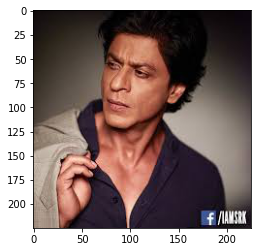

In [41]:
img = plt.imread("images/image1.jpg")
plt.imshow(img)

image2.jpg
image6.jpg
image5.jpg
image3.jpg


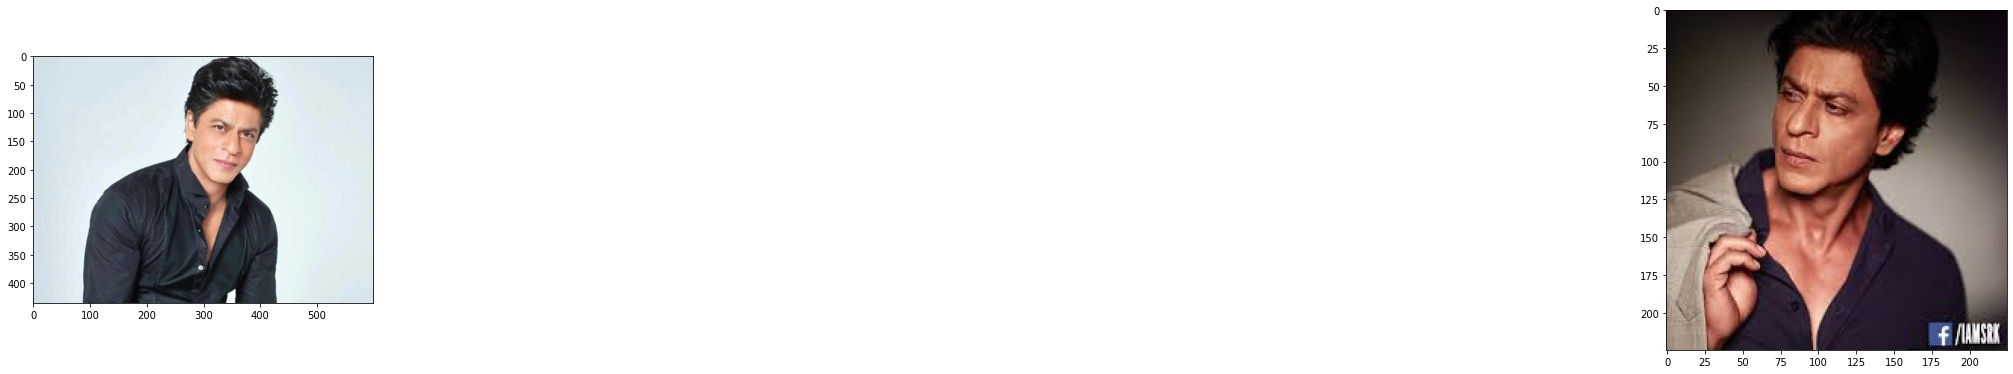

In [53]:
import os
fig = plt.figure(figsize=(50, 50))  # width, height in inches

for i, image in enumerate(os.listdir("images")):
    if image in matched_pairs:
        image = plt.imread(os.path.join("images", image))
        sub = fig.add_subplot(1, 7, i + 1)
        sub.imshow(image)
    else:
        print(image)

In [ ]:
fig, ax = plt.subplots(nrows=len(df), ncols=2)

for i, image in enumerate(images_to_keypoints):
    col = i % 2
    row = i // 2

    matched_image = matched_pairs.get(image, None):
        if matched_image is not None:
            img1 = 
    
    if image in matched_pairs:
        image = plt.imread(os.path.join("images", image))
        sub = fig.add_subplot(1, 7, i + 1)
        sub.imshow(image)

In [48]:
images_to_keypoints.keys()

dict_keys(['image2.jpg', 'image4.jpg', 'image6.jpg', 'image1.jpg'])

In [49]:
matched_pairs

{'image4.jpg': 'image1.jpg', 'image1.jpg': 'image4.jpg'}

In [52]:
print(matched_pairs['image2.jpg'])

KeyError: 'image2.jpg'

In [54]:
lst = ['image2.jpg', 'image4.jpg', 'image6.jpg', 'image1.jpg']

In [55]:
lst.remove("image4.jpg")

In [56]:
lst

['image2.jpg', 'image6.jpg', 'image1.jpg']